# Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1. Problem Statememt

# 2. Data Gathering

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. EDA

In [4]:
df['PassengerId'].nunique()

891

In [5]:
df['Name'].nunique()

891

In [6]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Gender           2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Drop Columns

In [10]:
columns_list = ['PassengerId','Name','Ticket','Cabin']
df.drop(columns_list,axis = 1, inplace = True)

In [11]:
# df['Test'] = 1000

In [12]:
df

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [14]:
df['Gender'].replace({'male':0,'female':1},inplace = True)

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df_embarked = pd.get_dummies(df['Embarked'])
df_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [17]:
df = pd.concat([df,df_embarked],axis = 1)


In [18]:
df.drop('Embarked',axis = 1, inplace = True)

In [19]:
# df.info()

In [70]:
df.describe()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,C,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.386083,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783
std,0.487123,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<AxesSubplot:>

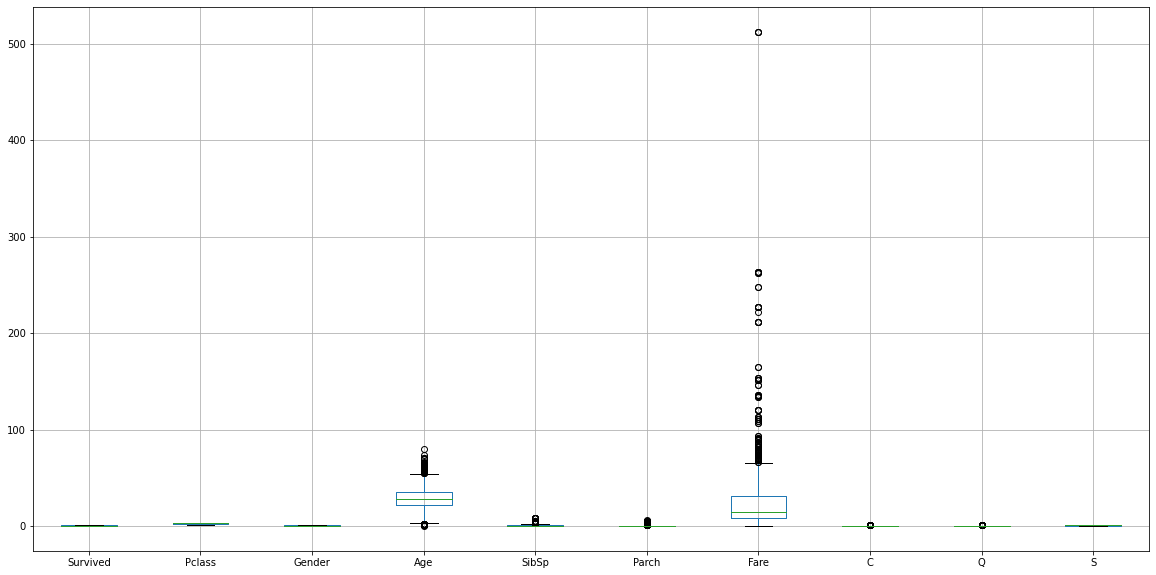

In [73]:
plt.figure(figsize = (20,10))
df.boxplot()

<AxesSubplot:>

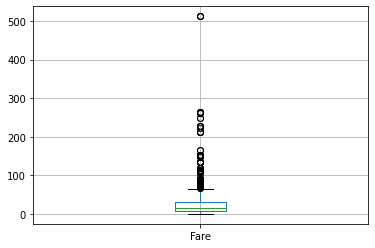

In [75]:
df[['Fare']].boxplot()

In [78]:
q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 3 * iqr
upper_tail

100.2688

In [82]:
from scipy import stats
zscore = stats.zscore(df['Fare'])
outlier_index = np.where(abs(zscore) > 4)
outlier_index
df['Fare'].iloc[outlier_index]

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: Fare, dtype: float64

In [21]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [22]:
df.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
C           0
Q           0
S           0
dtype: int64

In [23]:
# df.info()

In [24]:
df['Survived'].value_counts()

0    547
1    344
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

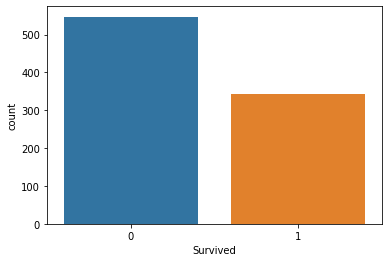

In [25]:
sns.countplot(x = 'Survived',data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

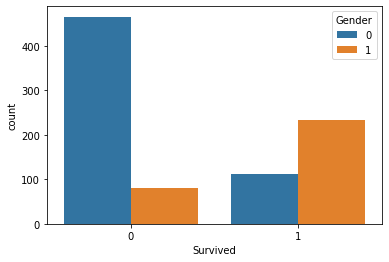

In [26]:
sns.countplot(x = 'Survived',hue = 'Gender',data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

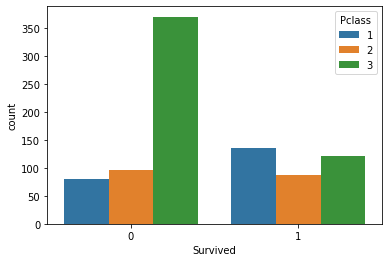

In [27]:
sns.countplot(x = 'Survived',hue = 'Pclass',data = df)

<AxesSubplot:>

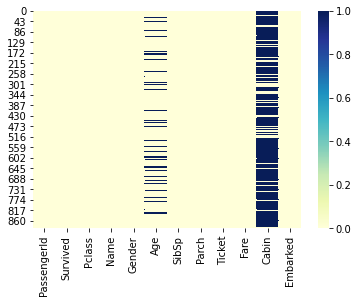

In [28]:
df1 = pd.read_csv('titanic.csv')
df1.isna()
sns.heatmap(df1.isna(),cmap = 'YlGnBu' )

In [29]:
# df.info()

# Feature Selection

In [30]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [31]:
y.value_counts()

0    547
1    344
Name: Survived, dtype: int64

In [32]:
344/547 # 63% samples for class 0

0.6288848263254113

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1,stratify=y)

In [34]:
y_train.value_counts()

0    437
1    275
Name: Survived, dtype: int64

In [35]:
275/437  # 61% sample for class 0 

0.6292906178489702

In [36]:
y_test

200    0
812    0
825    0
50     0
286    1
      ..
302    0
417    1
373    0
520    1
743    0
Name: Survived, Length: 179, dtype: int64

# Model Building

In [37]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [38]:
y_pred = lr_clf.predict(x_test)
y_pred[20:25]  # y pred 

array([1, 1, 0, 0, 0], dtype=int64)

In [39]:
y_test[20:25]  # y actual 

720    1
139    0
616    0
572    1
124    0
Name: Survived, dtype: int64

## Accuracy

In [40]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix is \n",cnf_matrix)

Confusion Matrix is 
 [[93 17]
 [19 50]]


In [41]:
    Actual Values
    P    N
P   TP   FP
N   FN   TN

    Actual Values
    1    0
1   TP   FP
0   FN   TN


# Sklearn Confusion Matrix
    Predicted Values
    0    1
0   TN   FP
1   FN   TP


[[93 17]
 [19 50]]

Precision = TP/(TP+FP)  # FP is used for precision


SyntaxError: invalid syntax (<ipython-input-41-3a10ab17c1e8>, line 1)

In [42]:
Precision = 50/(50+17)
Precision

0.746268656716418

In [43]:
Precision = 93/(93+19)
Precision

0.8303571428571429

In [44]:
Predicted 
    0    1
0   TN   FP   Actual Values 
1   FN   TP

[[93 17]
 [19 50]]

IndentationError: unexpected indent (<ipython-input-44-97944552bd17>, line 2)

In [45]:
precision_class0 = TN/(TN + FN)

NameError: name 'TN' is not defined

In [ ]:
# Recall = TP/(TP+FN)
Recall = 50/(50+19)
Recall

In [46]:
Accuracy = (93+50)/(93+50+19+17)
Accuracy

0.7988826815642458

In [47]:
accuracy_score(y_test,y_pred)

0.7988826815642458

In [48]:
clf_report = classification_report(y_test,y_pred)
print("Classification Report is:\n",clf_report)

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.75      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [49]:
# Probability of class 0 and class1
y_pred[0:7]

array([0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [50]:
y_pred_prob = lr_clf.predict_proba(x_test)
y_pred_prob

array([[0.88899646, 0.11100354],
       [0.8012675 , 0.1987325 ],
       [0.84452141, 0.15547859],
       [0.94338997, 0.05661003],
       [0.8951258 , 0.1048742 ],
       [0.41956072, 0.58043928],
       [0.40939581, 0.59060419],
       [0.10372313, 0.89627687],
       [0.92691224, 0.07308776],
       [0.52980224, 0.47019776],
       [0.88899646, 0.11100354],
       [0.8439113 , 0.1560887 ],
       [0.03464928, 0.96535072],
       [0.8898455 , 0.1101545 ],
       [0.52928715, 0.47071285],
       [0.75485293, 0.24514707],
       [0.9461105 , 0.0538895 ],
       [0.17754619, 0.82245381],
       [0.3774605 , 0.6225395 ],
       [0.3827955 , 0.6172045 ],
       [0.11266127, 0.88733873],
       [0.32039843, 0.67960157],
       [0.94059419, 0.05940581],
       [0.60546513, 0.39453487],
       [0.70355315, 0.29644685],
       [0.9441342 , 0.0558658 ],
       [0.83345324, 0.16654676],
       [0.84555931, 0.15444069],
       [0.00388279, 0.99611721],
       [0.05620937, 0.94379063],
       [0.

In [51]:
y_pred[-5:]

array([0, 1, 1, 1, 0], dtype=int64)

In [52]:
[[0.88899646, 0.11100354],  >> class 0
[0.8012675 , 0.1987325 ],
[0.84452141, 0.15547859],
[0.94338997, 0.05661003],
[0.8951258 , 0.1048742 ],
[0.41956072, 0.58043928],
[0.40939581, 0.59060419],  >> class 1

SyntaxError: invalid syntax (<ipython-input-52-c9517ed12aee>, line 1)

In [53]:
y_pred_prob[:,1]

array([0.11100354, 0.1987325 , 0.15547859, 0.05661003, 0.1048742 ,
       0.58043928, 0.59060419, 0.89627687, 0.07308776, 0.47019776,
       0.11100354, 0.1560887 , 0.96535072, 0.1101545 , 0.47071285,
       0.24514707, 0.0538895 , 0.82245381, 0.6225395 , 0.6172045 ,
       0.88733873, 0.67960157, 0.05940581, 0.39453487, 0.29644685,
       0.0558658 , 0.16654676, 0.15444069, 0.99611721, 0.94379063,
       0.06681648, 0.96302594, 0.09821198, 0.28538655, 0.98269205,
       0.7296793 , 0.95235669, 0.47955929, 0.18325153, 0.80541964,
       0.11156061, 0.15610501, 0.89945333, 0.10393506, 0.09844291,
       0.66709855, 0.11006455, 0.94559634, 0.76253998, 0.55598738,
       0.5219026 , 0.14393229, 0.86587975, 0.45122574, 0.89793185,
       0.54991593, 0.13423386, 0.09813317, 0.6899263 , 0.94653032,
       0.82271761, 0.08344075, 0.93206948, 0.75695617, 0.65872104,
       0.64307713, 0.13021409, 0.06304379, 0.0801654 , 0.12977924,
       0.08355466, 0.25711973, 0.72243291, 0.11433655, 0.07721

In [54]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob[:,1])

In [63]:
# thresh

In [65]:
# tpr

Predicted 
    0    1
0   TN   FP   Actual Values 
1   FN   TP

confusion_matrix(y_test,y_pred)  # threshold = 0.5

array([[93, 17],
       [19, 50]], dtype=int64)

In [62]:
thresh = 0.48
fpr = 0.1636
tpr = 0.72

In [69]:
# tpr = TP/(TP+FN) 
tpr = 50/(50+19)
# fpr = FP/(FP+TN)
fpr = 17/(93 + 17)
fpr

0.15454545454545454

# ROC Curve

Text(0, 0.5, 'True Positive Rate')

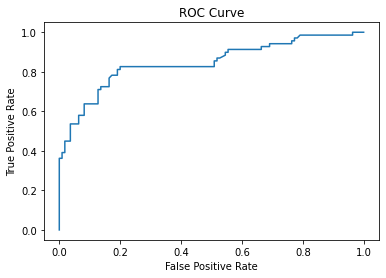

In [56]:
plt.title("ROC Curve")
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")

In [83]:
df = pd.read_csv('titanic.csv')


In [84]:
(df.isna().sum() / df.shape[0]) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64